# Working with Raw Data 

This section will serve as a tutorial on how to analyze and _____ data stored in the Allen Brain Mouse Connectivity Atlas. This section will go over how to download and visualize raw data as well as create projection matrices. 

In [1]:
# Import common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
print('Packages imported.')

Packages imported.


In [2]:
# Import the MouseConnectivityCache
import allensdk
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# Create an instance of the class and assign it to a variable, mcc
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')
print(mcc)

## Download and visualize gridded projection signal volumes (raw data)

The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. It contains the density of projecting signal, volume of projecting signal, and other information. MouseConnectivityCache provides methods for querying and storing this data. To access to this signal projection data, you must call the `get_structure_unionizes()` method on our MouseConnectivityCache instance.

For more information on the outputs of `get_structure_unionizes()` please visit <a href="https://alleninstitute.github.io/AllenSDK/unionizes.html">here</a>. For documentation on `get_structure_unionizes()` and other MouseConnectivityCache helper methods, please click <a href="https://alleninstitute.github.io/AllenSDK/allensdk.core.mouse_connectivity_cache.html">here</a>

In [3]:
# Grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

# Select cortical experiments 
isocortex = structure_tree.get_structures_by_name(['Isocortex'])[0]

# Find wild-type injections into primary motor cortex 
VISp = structure_tree.get_structures_by_name(['Primary visual area'])[0]
VISp_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[VISp['id']])
print("%d Primary visual area experiments" % len(VISp_experiments))

# Download projection signals for structure of interest 
structure_unionizes = mcc.get_structure_unionizes(experiment_ids = [exp['id'] for exp in 
                                                    VISp_experiments], 
                                                  is_injection=False,
                                                  structure_ids=[isocortex['id']],
                                                  include_descendants=True)

print("%d Primary visual area non-injection, cortical structure unionizes" % len(structure_unionizes))

33 Primary visual area experiments


29204 Primary visual area non-injection, cortical structure unionizes


This `structures_unionizes` is a very large dataframe filled with all the signal projection data for our experiments of interest. We can filter this like any other dataframe. For example, filter the dataframe to only include experiments with a large projection density and volume. For the purposes of this lesson, we will consider any `projection_density` and `volume` greater than 0.5 to be *large*. 

In [4]:
structure_unionizes.head()

,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,307297141,3,636132051,False,0.135948,5700,680,7490,0.000045,0.000090,0.011458,126.726430,0.000030,1030,5.779040e+10,269614784.0,3.089182e+06,2.437678e+04,0.330278
1,307297141,2,636125427,False,0.239197,4670,1090,6950,0.000218,0.000198,0.057760,292.118347,0.000145,320,1.609707e+11,598041920.0,3.454268e+07,1.182489e+05,0.732601
2,307297141,1,636130167,False,1.000000,9210,1990,2790,0.028052,0.205331,319.533539,1556.188721,0.018616,305,4.455195e+10,74012400.0,2.364944e+10,1.519703e+07,0.090665
3,307297141,1,636130887,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,6.701981e+09,51414300.0,0.000000e+00,0.000000e+00,0.062983
4,307297141,1,636128375,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1010,2.252017e+10,81598496.0,0.000000e+00,0.000000e+00,0.099958


In [5]:
# Only include experiments that have a large projection density 
dense_unionizes = structure_unionizes[structure_unionizes['projection_density'] > .5 ]

# Only include experiments from the dense dataframe that have a large volume 
large_unionizes = dense_unionizes[dense_unionizes['volume'] > .5 ]

# create a dataframe that contains metadata from structure IDs within our large and dense df
large_structures = pd.DataFrame(structure_tree.nodes(large_unionizes['structure_id']))

print("%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

# return all large, dense, cortical, structure unionizes 
print(large_structures['name'])

large_unionizes.head()

18 large, dense, cortical, non-injection unionizes, 18 structures
0               Lateral visual area
1         Rostrolateral visual area
2                   Postrhinal area
3                      Visual areas
4               Lateral visual area
5     Primary visual area, layer 6a
6               Lateral visual area
7               Primary visual area
8               Lateral visual area
9               Lateral visual area
10              Lateral visual area
11              Lateral visual area
12              Lateral visual area
13                  Postrhinal area
14              Lateral visual area
15     Primary visual area, layer 1
16              Primary visual area
17        Rostrolateral visual area
Name: name, dtype: object


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
229,307297141,2,636125869,False,1.0,9650,1820,9220,0.582058,0.598548,1902.673072,3178.812192,0.386275,409,1.172856e+12,5.268182e+08,1.002363e+12,3.153262e+08,0.645352
1538,113887162,2,633272766,False,1.0,7830,1500,8340,0.836458,0.627888,1960.408377,3122.223785,0.341144,417,9.620248e+11,4.435262e+08,8.694925e+11,2.784850e+08,0.543320
1841,180296424,2,630240820,False,1.0,9310,3180,9690,0.626614,0.744479,4059.921430,5453.373345,0.510067,312782628,2.350927e+12,5.592923e+08,2.270683e+12,4.163813e+08,0.685133
2306,180296424,2,630239708,False,1.0,9170,2300,9690,4.241160,0.522139,2128.869392,4077.206061,3.452329,669,1.279820e+13,5.397464e+09,1.149050e+13,2.818228e+09,6.611893
2476,180296424,3,630241279,False,1.0,9440,2350,2440,0.712232,0.532626,2363.397654,4437.253859,0.579761,409,2.262464e+12,8.885676e+08,2.100039e+12,4.732744e+08,1.088495


## Build a structure-to-structure matrix of projection signal values

The MouseConnectivityCache class provides a helper method for converting ProjectionStructureUnionize data for a set of experiments and structures into a matrix. This is done by calling `get_projection_matrix` on our MouseConnectivityCache instance. The method can take in arguements `experiment_ids`, `projection_structure_ids`, `hemisphere_ids`, `parameter`, and `dataframe` to further specify your matrix.

The code below demonstrates how to make a matrix of projection density values in auditory sub-structures for cre-negative VISp experiments.

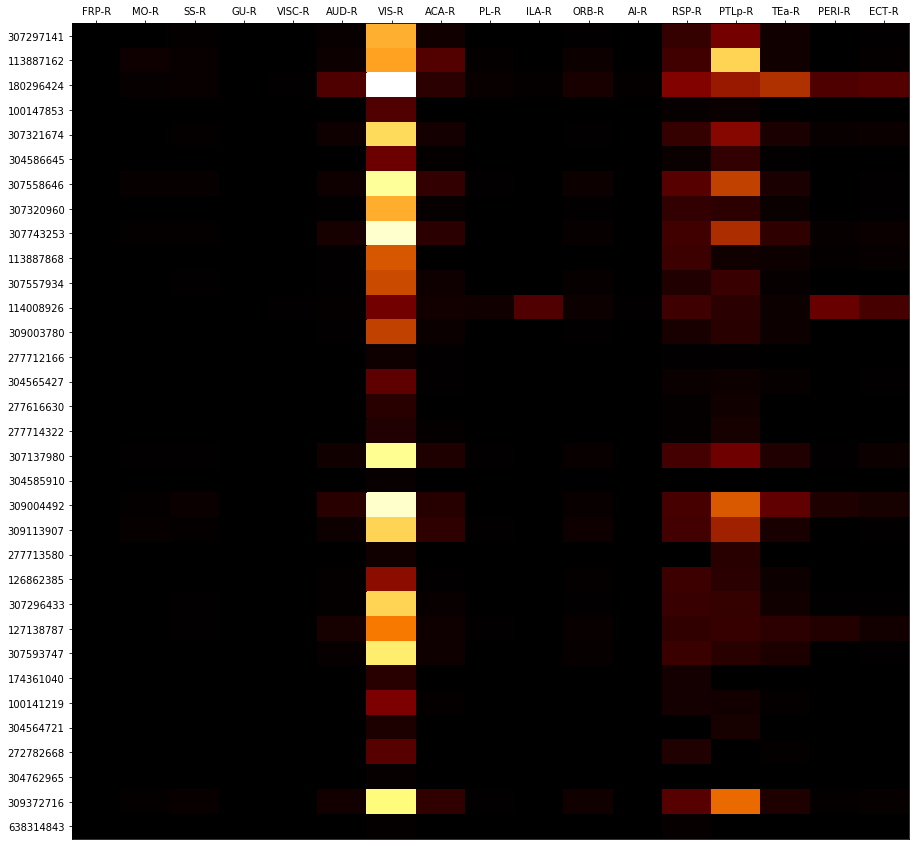

In [6]:
# Collect all experiment IDs from primary visual area experiments 
visp_experiment_ids = [ exp['id'] for exp in VISp_experiments ]

ctx_children = structure_tree.child_ids( [isocortex['id']] )[0]

# Create your projection matrix 
pm = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

# These are just experiment ids
row_labels = pm['rows'] 
# These are the brain structures 
column_labels = [ col['label'] for col in pm['columns'] ]

matrix = pm['matrix']

# Plot your matrix 
fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# Put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# Want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

Using another feature of the MouseConnectivityCache, we can show an example of what an image of fluorescence would look like for a given experiment. The code below demonstrates how you can load the projection density for a particular experiment and plot it to see how it looks.

In [7]:
# VTA experiment of interest 
experiment_id = 307297141

# projection density: number of projecting pixels / voxel volume
projection_density, pd_info = mcc.get_projection_density(experiment_id)

# Injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# Data mask:
# Binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()

annot, annot_info = mcc.get_annotation_volume()

# In addition to the annotation volume, you can get binary masks for individual structures
# this is a binary mask for the VTA
VTA_mask, cm_info = mcc.get_structure_mask(314)

print(pd_info)
print(projection_density.shape, template.shape, annot.shape)

OrderedDict([('type', 'double'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([528, 320, 456])), ('space directions', array([[25.,  0.,  0.],
       [ 0., 25.,  0.],
       [ 0.,  0., 25.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])
(528, 320, 456) (528, 320, 456) (528, 320, 456)


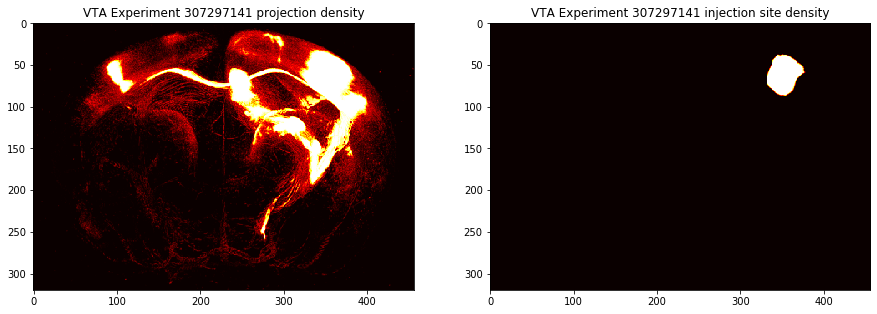

In [8]:
#Compute the maximum intensity projection of the projection data
pd_mip = projection_density.max(axis=0)
ind_mip = ind.max(axis=0)

#Show that slice of all volumes side-by-side
f, pr_axes = plt.subplots(1, 2, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("VTA Experiment 307297141 projection density")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("VTA Experiment 307297141 injection site density")

plt.show()

## Additional Resources 

For more information on all the functions used to download the projection signals and create the projection matrices, please look at the <a href = 'https://alleninstitute.github.io/AllenSDK/allensdk.core.mouse_connectivity_cache.html'> original documentaion</a>. For information on how to create heat maps like the one created for the flourecense image, please visit the <a href = 'https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html'> matplotlib documentation</a>.